In [20]:
#Q1
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

mean_s = iris['sepal_length'].mean()

median_s = iris['sepal_length'].median()
mode_result = stats.mode(iris['sepal_length'])
mode_s = mode_result[0]

# Print the results
print(f"Mean of sepal lengths: {mean_s}")
print(f"Median of sepal lengths: {median_s}")
print(f"Mode of sepal lengths: {mode_s}")


Mean of sepal lengths: 5.843333333333334
Median of sepal lengths: 5.8
Mode of sepal lengths: 5.0


In [15]:

#Q2

variance = iris['petal_width'].var()


std_deviation = iris['petal_width'].std()


print(f"Variance of petal widths: {variance}")
print(f"Standard Deviation of petal widths: {std_deviation}")

Variance of petal widths: 0.5810062639821029
Standard Deviation of petal widths: 0.7622376689603465


In [16]:
#q3



summary_stats = {
    'Feature': [],
    'Mean': [],
    'Median': [],
    'Variance': [],
    'Standard Deviation': []
}


numerical_features = iris.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    mean_value = iris[feature].mean()
    median_value = iris[feature].median()
    variance_value = iris[feature].var()
    std_dev_value = iris[feature].std()
    
    summary_stats['Feature'].append(feature)
    summary_stats['Mean'].append(mean_value)
    summary_stats['Median'].append(median_value)
    summary_stats['Variance'].append(variance_value)
    summary_stats['Standard Deviation'].append(std_dev_value)


summary_table = pd.DataFrame(summary_stats)

print(summary_table)

        Feature      Mean  Median  Variance  Standard Deviation
0  sepal_length  5.843333    5.80  0.685694            0.828066
1   sepal_width  3.057333    3.00  0.189979            0.435866
2  petal_length  3.758000    4.35  3.116278            1.765298
3   petal_width  1.199333    1.30  0.581006            0.762238


NameError: name 'norm' is not defined

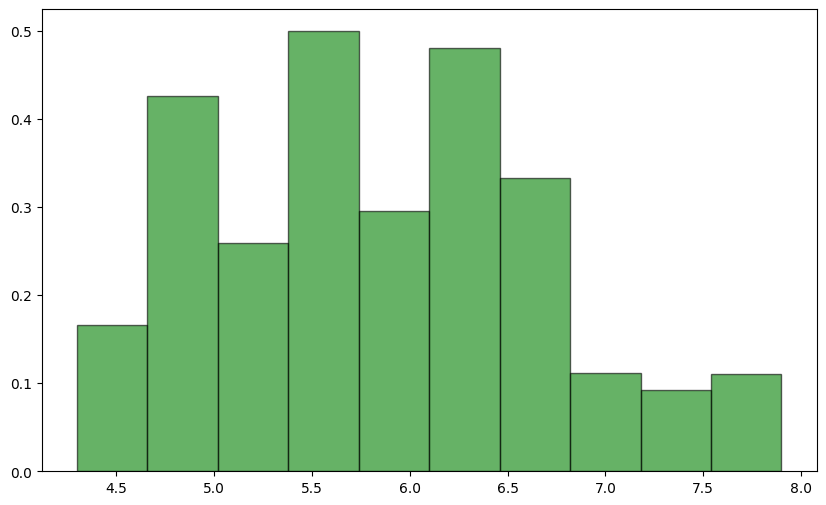

In [22]:
#Q4

sepal_length = iris['sepal_length']


hist, bins = np.histogram(sepal_length, bins=10, density=True)


bin_centers = 0.5 * (bins[1:] + bins[:-1])


plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')




xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Sepal Lengths')

plt.show()

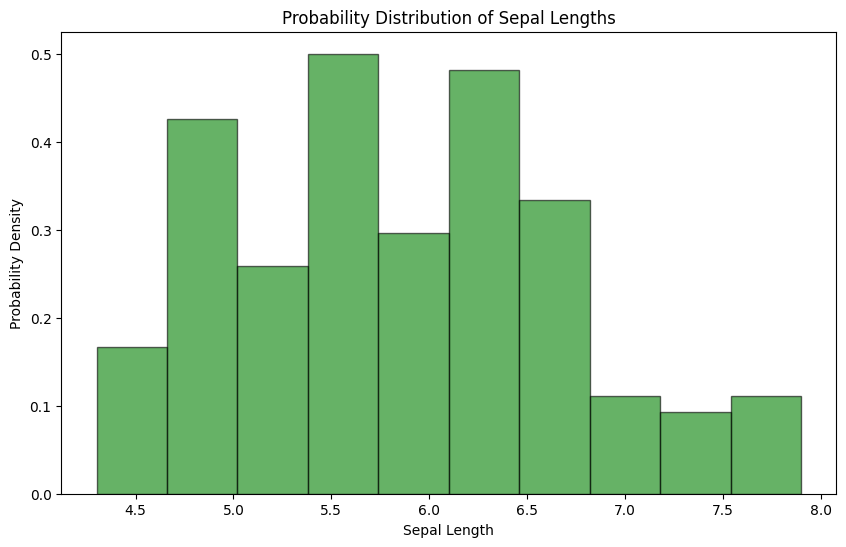

In [23]:
#Q5
sepal_length = iris['sepal_length']


plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')


plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Sepal Lengths')


plt.show()

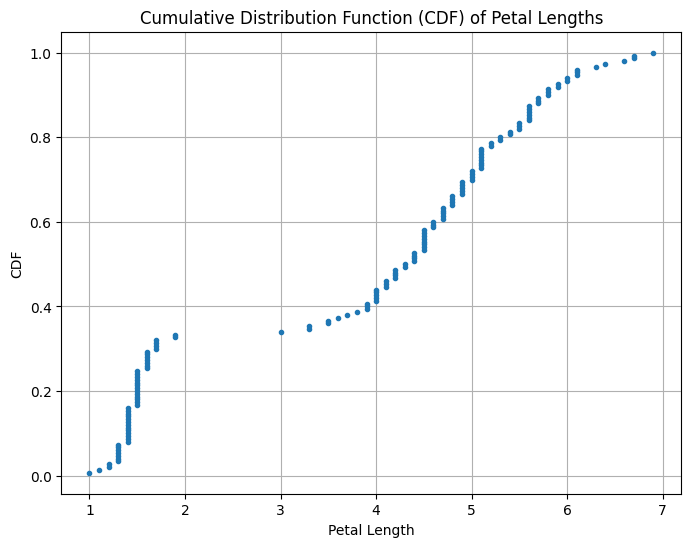

In [25]:
#Q6
petal_lengths = iris['petal_length']


sorted_p_l = np.sort(petal_lengths)

cdf = np.arange(1, len(sorted_p_l)+1) / len(sorted_p_l)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_p_l, cdf, marker='.', linestyle='none')
plt.xlabel('Petal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Petal Lengths')
plt.grid(True)
plt.show()

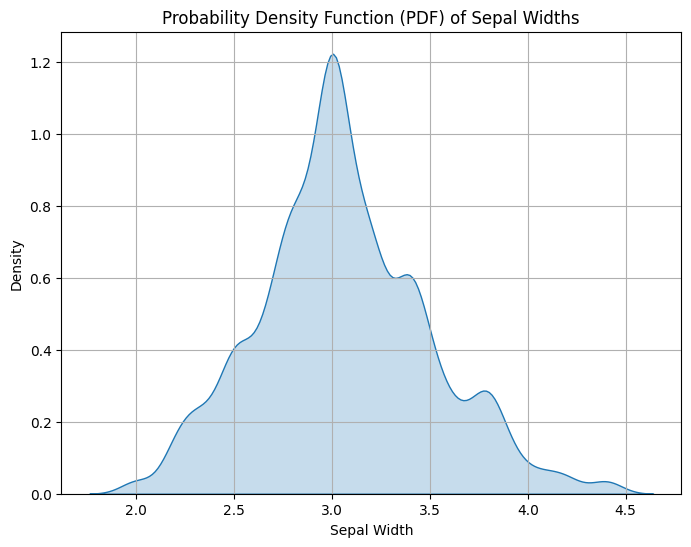

In [26]:
#Q7
sepal_widths = iris['sepal_width']


plt.figure(figsize=(8, 6))
sns.kdeplot(sepal_widths, bw_adjust=0.5, fill=True)
plt.xlabel('Sepal Width')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Sepal Widths')
plt.grid(True)
plt.show()

In [27]:
#Q8
petal_lengths = iris['petal_length']

sorted_petal_lengths = np.sort(petal_lengths)

cdf = np.arange(1, len(sorted_petal_lengths) + 1) / len(sorted_petal_lengths)

def probability_greater_than(value):

    cdf_value = np.interp(value, sorted_petal_lengths, cdf)
   
    return 1 - cdf_value

value = 4.5
prob = probability_greater_than(value)
print(f"The probability of a randomly selected iris flower having a petal length greater than {value} is {prob:.4f}")

The probability of a randomly selected iris flower having a petal length greater than 4.5 is 0.4200


In [29]:
#Q9
from scipy.stats import ttest_ind

species1 = 'setosa'
species2 = 'versicolor'


petal_lengths_species1 = iris[iris['species'] == species1]['petal_length']
petal_lengths_species2 = iris[iris['species'] == species2]['petal_length']

from scipy.stats import shapiro, levene


shapiro_species1 = shapiro(petal_lengths_species1)
shapiro_species2 = shapiro(petal_lengths_species2)


levene_test = levene(petal_lengths_species1, petal_lengths_species2)

print(f"Shapiro-Wilk Test for {species1}: p-value = {shapiro_species1.pvalue:.4f}")
print(f"Shapiro-Wilk Test for {species2}: p-value = {shapiro_species2.pvalue:.4f}")
print(f"Levene's Test for equal variances: p-value = {levene_test.pvalue:.4f}")


t_stat, p_value = ttest_ind(petal_lengths_species1, petal_lengths_species2, equal_var=levene_test.pvalue > 0.05)

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"There is a significant difference in the mean petal length between {species1} and {species2}.")
else:
    print(f"There is no significant difference in the mean petal length between {species1} and {species2}.")

Shapiro-Wilk Test for setosa: p-value = 0.0548
Shapiro-Wilk Test for versicolor: p-value = 0.1585
Levene's Test for equal variances: p-value = 0.0000
T-test: t-statistic = -39.4927, p-value = 0.0000
There is a significant difference in the mean petal length between setosa and versicolor.
